In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
energy_dataset = pd.read_csv('C:/Users/Dell/Desktop/Appliances-energy-prediction-data-master/energydata_complete.csv')

In [4]:
energy_dataset.rename(columns={'T1':'TempKitchen','RH_1':'HumKitchen','T2':'TempLivingRoom','RH_2':'HumLivingRoom',
                   'T3':'TempLaundryRoom','RH_3':'HumLaundryRoom','T4':'TempOfficeRoom','RH_4':'HumOfficeRoom',
                   'T5':'TempBathRoom','RH_5':'HumBathRoom','T6':'TempOutsideNorth','RH_6':'HumOutsideNorth',
                   'T7':'TempIroningRoom','RH_7':'HumIroningRoom','T8':'TempTeenagerRoom','RH_8':'HumTeenagerRoom',
                   'T9':'TempParentRoom','RH_9':'_HumParentRoom','T_out':'TempOutside','Press_mm_hg':'Pressure',
                   'RH_out':'Humidity'},inplace=True)

In [5]:
X1 = energy_dataset[['lights', 'TempKitchen', 'HumKitchen', 'TempLivingRoom',
      'HumLivingRoom', 'TempLaundryRoom', 'HumLaundryRoom', 'TempOfficeRoom',
      'HumOfficeRoom', 'TempBathRoom', 'HumBathRoom',
      'HumOutsideNorth', 'TempIroningRoom', 'HumIroningRoom',
      'TempTeenagerRoom', 'HumTeenagerRoom', 'TempParentRoom',
      'Pressure', 'Humidity', 'Windspeed',
      'Tdewpoint']]

In [6]:
y1 = (energy_dataset['Appliances'])

In [7]:
import statsmodels.api as sm

def stepwise_selection(X1, y1,
                      initial_list=[],
                      threshold_in=0.01,
                      threshold_out = 0.05,
                      verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X1.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y1, sm.add_constant(pd.DataFrame(X1[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

       # backward step
        model = sm.OLS(y1, sm.add_constant(pd.DataFrame(X1[included]))).fit()
       # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X1, y1)

print('resulting features:')
print(result)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


Add  lights                         with p-value 2.30511e-172
Add  Humidity                       with p-value 3.79644e-127
Add  HumKitchen                     with p-value 2.41767e-62
Add  HumTeenagerRoom                with p-value 1.38045e-101
Add  HumLivingRoom                  with p-value 8.86001e-71
Drop Humidity                       with p-value 0.124113


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


Add  HumIroningRoom                 with p-value 1.19323e-18
Add  Windspeed                      with p-value 8.74775e-17
Add  TempLaundryRoom                with p-value 6.83249e-14
Add  TempParentRoom                 with p-value 7.29809e-104
Add  TempLivingRoom                 with p-value 1.99855e-39
Add  TempTeenagerRoom               with p-value 1.40776e-14
Add  TempOfficeRoom                 with p-value 1.56614e-09
Add  HumLaundryRoom                 with p-value 7.55903e-07
Add  Tdewpoint                      with p-value 4.92383e-07
Add  TempKitchen                    with p-value 0.00024752
resulting features:
['lights', 'HumKitchen', 'HumTeenagerRoom', 'HumLivingRoom', 'HumIroningRoom', 'Windspeed', 'TempLaundryRoom', 'TempParentRoom', 'TempLivingRoom', 'TempTeenagerRoom', 'TempOfficeRoom', 'HumLaundryRoom', 'Tdewpoint', 'TempKitchen']


In [56]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# load the iris datasets
# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X1, y1)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True  True False False False False  True
 False False False  True  True  True False  True False False False False]
[ 3 10  1  1  1  1  1  2 12 15 14  1 11  6  5  1  1  1  8  1 13  9  4  7]


In [50]:
X1 = energy_dataset[['lights','TempKitchen' , 'HumKitchen' , 'TempLivingRoom' , 'HumLivingRoom' , 'TempLaundryRoom' , 'HumLaundryRoom' , 'TempOfficeRoom' , 'HumOfficeRoom' , 'TempOutsideNorth' , 'HumOutsideNorth' , 'TempTeenagerRoom' , 'HumTeenagerRoom' , 'TempParentRoom' , '_HumParentRoom' , 'TempOutside' , 'Pressure' , 'Humidity', 'Windspeed' ] ]

In [51]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# fit an Extra Trees model to the data
model = ExtraTreesRegressor(n_estimators = 100 , random_state = np.random)
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_* 1000)
prediction = model.predict(X_test)
r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

rmse = np.sqrt(mse)
mape =  np.mean(np.abs((y_test-prediction) / y_test) ) * 100
accuracy = 100 - mape
print(prediction)
print("Accuracy:" , round(accuracy, 2), '%.')
print("Mape" , mape)
print("R2" , r2)
print("MAE" , mae)
print("RMSE" , rmse)

[ 55.11454812  57.13834366  47.07419979  52.02204997  59.10019743
  55.81434056  43.58634882  40.53731446  41.88326546  45.7309231
  45.42264318  48.02112789  39.15488829  43.91212006  46.84762863
  53.35517086  37.44734786  39.57246145  42.86495816  57.94804196
  47.45208028]
[ 239.5   52.3  241.5 ...,   43.3  283.1   75.4]
Accuracy: 70.69 %.
Mape 29.310345910058892
R2 0.559938245986
MAE 31.5810742336
RMSE 70.804113836


In [23]:
from sklearn.cross_validation import train_test_split  
from tpot import TPOTRegressor  
X = X1.values  
y = y1.values  
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                   train_size=0.75,  
                                                   test_size=0.25)  
my_tpot = TPOTRegressor(generations=5, population_size = 20 , verbosity= 2)
my_tpot.fit(X_train, y_train)  
print(my_tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: -6273.251153030268


Generation 2 - Current best internal CV score: -4909.293020807397


Generation 3 - Current best internal CV score: -4878.41941605001


Generation 4 - Current best internal CV score: -4878.41941605001


Generation 5 - Current best internal CV score: -4878.41941605001



Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=100)
-4182.09407051


In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = X1.values
y = y1.values

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_estimators=100 , max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	8
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	7
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	99 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	1


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	20
Tentative: 	2
Rejected: 	1


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       4])

In [61]:
X1.columns

Index(['lights', 'TempKitchen', 'HumKitchen', 'TempLivingRoom',
       'HumLivingRoom', 'TempLaundryRoom', 'HumLaundryRoom', 'TempOfficeRoom',
       'HumOfficeRoom', 'TempBathRoom', 'HumBathRoom', 'TempOutsideNorth',
       'HumOutsideNorth', 'TempIroningRoom', 'HumIroningRoom',
       'TempTeenagerRoom', 'HumTeenagerRoom', 'TempParentRoom',
       '_HumParentRoom', 'TempOutside', 'Pressure', 'Humidity', 'Windspeed',
       'Tdewpoint'],
      dtype='object')

In [63]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

In [64]:
ridgeReg.score(X_test,y_test)

0.13494351305602692

In [65]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.03, normalize=True)
lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)

In [66]:
lassoReg.score(X_test,y_test)

0.088412925123283137

In [67]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)

pred_cv = ENreg.predict(X_test)

In [68]:
ENreg.score(X_test,y_test)

0.090048255166207736

In [8]:
X1 = energy_dataset[['lights','TempKitchen' , 'HumKitchen' , 'TempLivingRoom' , 'HumLivingRoom' , 'TempLaundryRoom' , 'HumLaundryRoom' , 'TempOfficeRoom' , 'HumOfficeRoom' , 'TempBathRoom' , 'HumBathRoom' , 'TempOutsideNorth' , 'HumOutsideNorth' , 'TempIroningRoom' , 'HumIroningRoom' , 'TempTeenagerRoom' , 'HumTeenagerRoom' , 'TempParentRoom' , '_HumParentRoom' , 'TempOutside' , 'Pressure' , 'Humidity', 'Windspeed','Tdewpoint' ] ]

<module 'matplotlib.pyplot' from 'C:\\Users\\Dell\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

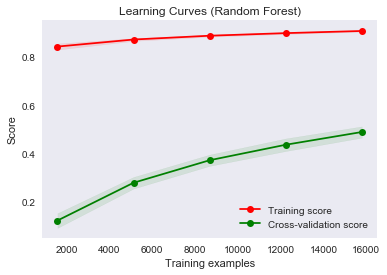

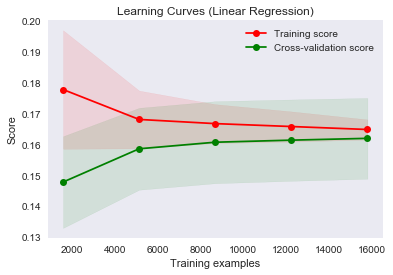

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
       estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = X1, y1


title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)


title = "Learning Curves (Linear Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)